# 随机微分方程模拟

### 一道简单的差分方程例题

有一个医生给病人开药，要求病人血液中的钙离子浓度稳定在一个有效的值，求如何开药？
前提：
A在病人体内原本就有。
不服药的情况下，每一周的A浓度水平是前一周的一半。
列式：
an+1 = 0.5 × an + b

In [1]:
import matplotlib.pyplot as plt
def drawCurve(Reagentperday,CurrentLevel):
    RegentLevel = []
    for i in range(15):
        RegentLevel.append(CurrentLevel)
        CurrentLevel = CurrentLevel * 0.5 + Reagentperday
    Time = [i for i in range(15)]
    #print(Time,RegentLevel)
    plt.plot(Time, RegentLevel)

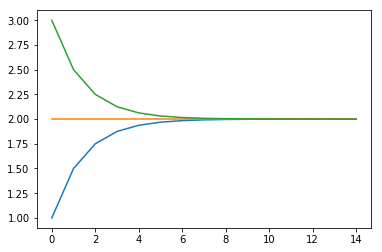

In [2]:
for i in range(1,4):
    drawCurve(1,i)

### 一般的微分方程模拟
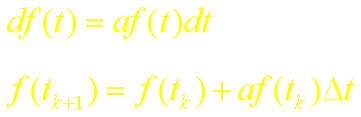

In [41]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# X1,Y1为横纵坐标
X1 = np.linspace(0,10,1000)
def Y1(a,y) :
        X1 = np.linspace(0,10,1000)
        dt = 10/1000
        Y = []
        for i in X1 :
            Y.append(y)
            y = y + a*y*dt
        return Y

In [82]:
def pict1(base_number=1.5,a=1,n=100,c=2,m=4) :
    # 配置画布
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=80)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('ODE')
    # 绘制图像
    for i in range(0,m) :
        a = pow(base_number,i)
        c = i
        for j in range(n) :
            plt.subplot(4,2,i+1) # 添加子图
            plt.title('(%d)'%(i+1)) # 设置标题
            plt.xlabel('x') # 坐标轴名
            plt.ylabel('y')
            l, = plt.plot(X1,Y1(a,j),cl[c]) #画图
        plt.legend(handles=[l,],labels=['a=%.1f'%a]) # 设置图例
    plt.tight_layout() #调整空白间隔
    #plt.savefig(r'D:\JWE\My Program\matplotlib\模拟1：dft=ft+aftdt.png')
    plt.show()

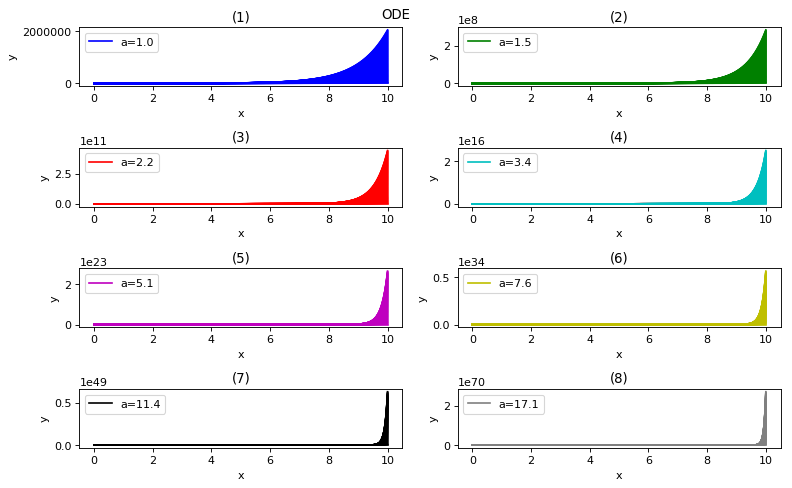

In [83]:
pict1(m=8)

### 随机微分方程模拟
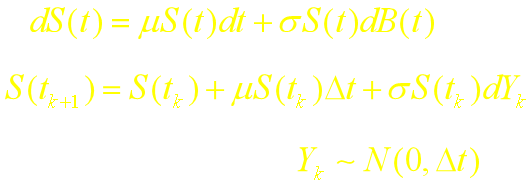

In [53]:
import numpy as np
from matplotlib import pyplot as plt

In [54]:
# 主要是函数的变化
X2 = np.linspace(0,10,1000)
def Y2(mu,sigma,y) :
        X2 = np.linspace(0,10,1000)
        dt = 10/1000
        norm = np.random.normal(0,dt)
        Y = []
        for i in X2 :
            Y.append(y)
            y = y + mu*y*dt +sigma*y*norm
        return Y

In [84]:
# 基本上只用对一般方法进行调参
def pict2(base_number=1,mu=0,sigma=1,n=100,c=2,m=4) :
    # 配置画布
    fig = plt.figure(num=1, figsize=(10, 6.18),dpi=80)
    cl = ('b','g','r','c','m','y','k','gray')
    fig.suptitle('SDE')
    # 绘制图像
    for i in range(0,m) :
        mu = np.random.random()
        sigma = np.random.random()
        c = i
        for j in range(n) :
            plt.subplot(4,2,i+1) # 添加子图
            plt.title('(%d)'%(i+1)) # 设置标题
            plt.xlabel('x') # 坐标轴名
            plt.ylabel('y')
            l, = plt.plot(X2,Y2(mu,sigma,j),cl[c]) #画图
        plt.legend(handles=[l,],labels=['mu=%.1f sigma=%.1f'%(mu,sigma)]) # 设置图例
    plt.tight_layout() #调整空白间隔
    #plt.savefig(r'D:\JWE\My Program\matplotlib\模拟2：dSt=muStdt+sigmaStdB.png')
    plt.show()

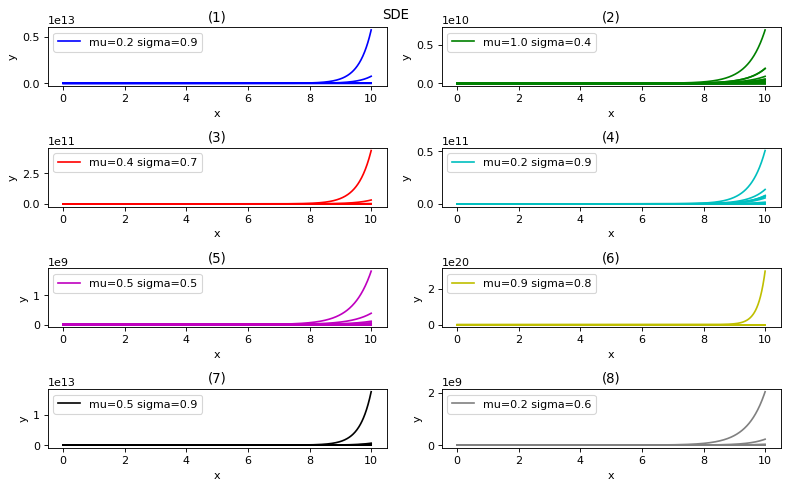

In [85]:
pict2(m=8)